In [1]:
ENV["PYTHONPATH"] = "/home/gridsan/aligho/.local/lib/python3.8/site-packages/PyNormaliz-2.15-py3.8-linux-x86_64.egg";
D = 2;
using HDF5, PyPlot
using DelimitedFiles, PyPlot, LinearAlgebra, JLD2, PyCall, StaticArrays, Statistics
using Crystalline, Brillouin, MPBUtils, SymmetryBases
using Crystalline: TEST_αβγs, TEST_αβγ, dot, norm
using Crystalline: normscale, matching_littlegroups
using Crystalline: AbstractFourierLattice
topology_paper_dir = "../../TopologyPaper/"
include(topology_paper_dir * "get-freqs-symeigs.jl")
include(topology_paper_dir * "symeigs-from-io.jl");
include("../../Topology_ML/Phc_ML/fft.jl")
include("../get_uc_coefs.jl");
np = pyimport("numpy");

In [2]:
root_dir_smooth = "./inverse_design_two_tone_symbols_random/"
root_dir_two_tone = "./inverse_design_two_tone_symbols_random/"

dirac_point_dir = "./inverse_design_two_tone_symbols_random/changing_contrast/dirac_points/logs/";
contrast_dispersion_dir = root_dir_two_tone * "changing_contrast/dispersion/output/sg2/tm/contrast6/"
contrast_dispersion_log_dir = root_dir_two_tone * "changing_contrast/dispersion/logs/"
contrast_dir = root_dir_two_tone * "changing_contrast/output/sg2/tm/contrast6/";

smooth_dir = root_dir_smooth * "output/sg2/tm/"
two_tone_dir = root_dir_two_tone * "output/sg2/tm/";

In [3]:
# We look at id = 1629. This should be in the seventh category 
ns = [[0, 1, 0, 1, 0, 1, 1, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0, 1], 
[0, 1, 0, 1, 1, 0, 1, 0, 1], [0, 1, 1, 0, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 0, 1], 
[1, 0, 1, 0, 0, 1, 1, 0, 1], [1, 0, 0, 1, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0, 1]];

In [4]:
filename = "sg2-tm.jld2";
loaded_data_smooth = load(smooth_dir * filename);

In [7]:
filename = "sg2-tm.jld2";
loaded_data_two_tone = load(two_tone_dir * filename);

In [26]:
@assert first(loaded_data_smooth["summariesv"][1629]).n == ns[7]
@assert first(loaded_data_two_tone["summariesv"][1629]).n == ns[7]

In [10]:
loaded_data_two_tone["summariesv"][1629]

10-element Vector{BandSummary}:
 1-band (nontrivial): [Y₁, B₂, A₁, Γ₁]
 1-band (trivial): [Y₂, B₁, A₂, Γ₁]
 1-band (trivial): [Y₂, B₁, A₁, Γ₂]
 1-band (trivial): [Y₁, B₂, A₂, Γ₁]
 1-band (trivial): [Y₂, B₁, A₁, Γ₂]
 1-band (trivial): [Y₁, B₂, A₂, Γ₁]
 1-band (nontrivial): [Y₁, B₂, A₂, Γ₂]
 1-band (trivial): [Y₂, B₁, A₁, Γ₂]
 1-band (trivial): [Y₂, B₁, A₂, Γ₁]
 1-band (trivial): [Y₁, B₂, A₁, Γ₂]

In [11]:
loaded_data_v = []
for contrast_idx in 1:6
    contrast_dir = "./inverse_design_two_tone_symbols_random/changing_contrast/output/sg2/tm/contrast$(contrast_idx)/"
    filename = "sg2-tm-contrast$(contrast_idx).jld2";
    loaded_data = load(contrast_dir * filename);
    push!(loaded_data_v, loaded_data)
end

In [31]:
[@assert first(loaded_data_v[1]["summariesv"][1629]).n == ns[7] for contrast_idx in 1:6];

In [71]:
sg = 2 
true_id = 101629
mode = "tm"
io = open(dirac_point_dir*"dim2-sg$sg-$(true_id)-res64-$(mode).log")
logstr = read(io, String)

"command-line param: run-type=\"tm\"\ncommand-line param: dim=2\ncommand-line param: sgnum=2\ncommand-line param: res=64\ncommand-line param: rvecs=(list (vector3 1.0 0.0) (vector3 -0.36223789539191514 0.37002927084142506))\ncommand-line param: uc-gvecs=(list (vector3 -1 0) (" ⋯ 11842355 bytes ⋯ " 4 (0.5069383585276784) to band 5 (0.5074078732710057), 0.09257484843112648%\ntotal elapsed time for run: 1 hour, 6 minutes, 42 seconds.\ndone.\nepsilon: 1-12, mean 6.49254, harm. mean 1.89355, 52.0264% > 1, 49.9322% \"fill\"\nOutputting dim2-sg2-101629-res64-tm-epsilon...\n"

In [72]:
dispersion_str = logs_to_dispersion(logstr, "tm");
dispersion_finer = readdlm(IOBuffer(dispersion_str), ',')[:, 6:end]
dispersion_finer = sort(dispersion_finer, dims=2);
kpts_finer = readdlm(IOBuffer(dispersion_str), ',')[:, 2:4];
kpts_finer = kpts_finer;

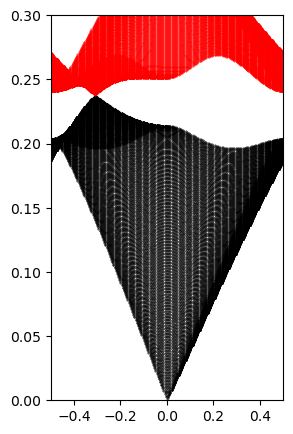

In [74]:
figure(figsize=(3, 5))
scatter(kpts_finer[:, 1], dispersion_finer[:, 1], s=0.1, color="black")
scatter(kpts_finer[:, 1], dispersion_finer[:, 2], s=0.1, color="red")
ylim(0, 0.3)
#ylim(0.23, 0.25)
xlim(-0.5, 0.5);

### Finding the Dirac point frequency below

In [57]:
println("Dirac point frequency: ", dispersion[:, 2][argmin(dispersion[:, 2] - dispersion[:, 1])])

Dirac point frequency: 0.237848


In [56]:
println("Dirac point quasimomentum: ", kpts_finer[[argmin(dispersion[:, 2] - dispersion[:, 1])], 1:3])

Dirac point quasimomentum: [-0.31 0.3475 0.0]


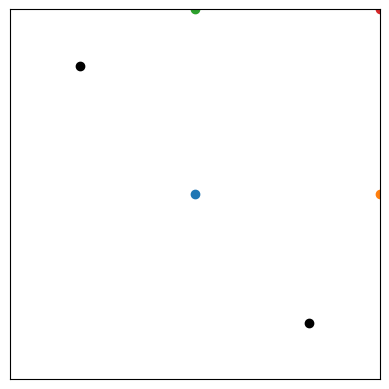

In [39]:
plt.scatter(-0.31, 0.3475, color="black")
plt.scatter(0.31, -0.3475, color="black")
plt.scatter(0, 0)
plt.scatter(0.5, 0)
plt.scatter(0, 0.5)
plt.scatter(0.5, 0.5)


plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
gca().set_aspect("equal")
#plt.savefig("./figures/dirac_point_bz.pdf")
plt.xticks([])
plt.yticks([]);

In [75]:
f = jldopen(contrast_dispersion_log_dir * "sg2-contrast_idx6-tm-log.jld2")
logsv = f["logsv"];
close(f)

In [76]:
dispersionsv_high_contrast = Matrix{Float64}[];
kpts = Vector{Float64}()
for (id, logstr) in enumerate(logsv)
    dispersion_str = logs_to_dispersion(logstr, "tm");
    dispersion = readdlm(IOBuffer(dispersion_str), ',')[:, 6:end]
    dispersion = sort(dispersion, dims=2)
    push!(dispersionsv_high_contrast, dispersion)
    kpts = readdlm(IOBuffer(dispersion_str), ',')[:, 2:4];
    (id == 1) && global kpts = kpts
end

In [77]:
A_point_idxs = findall(x-> isapprox(x, 0), [norm([0.5, 0.5, 0] .- collect(row)) for row in eachrow(kpts)])
Gamma_point_idxs = findall(x-> isapprox(x, 0), [norm([0, 0, 0] .- collect(row)) for row in eachrow(kpts)])
B_point_idxs = findall(x-> isapprox(x, 0), [norm([0.5, 0, 0] .- collect(row)) for row in eachrow(kpts)]);
Y_point_idxs = findall(x-> isapprox(x, 0), [norm([0, 0.5, 0] .- collect(row)) for row in eachrow(kpts)]);

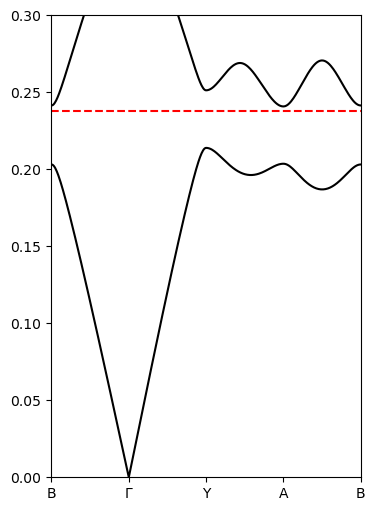

In [78]:
figure(figsize=(4, 6))
dispersion = dispersionsv_high_contrast[1629]

plot(range(1, 405), dispersion[:, 1:3], color="black");
ylim(0, 0.3)
xlim(0, 3);
xticks([Gamma_point_idxs..., A_point_idxs..., B_point_idxs..., Y_point_idxs...], [repeat(["Γ"], length(Gamma_point_idxs))...,
        repeat(["A"], length(A_point_idxs))..., repeat(["B"], length(B_point_idxs))..., repeat(["Y"], length(Y_point_idxs))...])
;
hlines([0.237848], 1, 405, color="red", linestyle="dashed");
#savefig("./figures/dirac_point_bands.pdf")

### Below, we overlay the finer dirac point dispersion onto the bulk dispersion above

In [79]:
indices = Int64[]
for kpt in eachrow(kpts)
    index = argmin([norm(kpt .- kpts_finer_row) for kpts_finer_row in eachrow(kpts_finer)])
    push!(indices, index)
end;

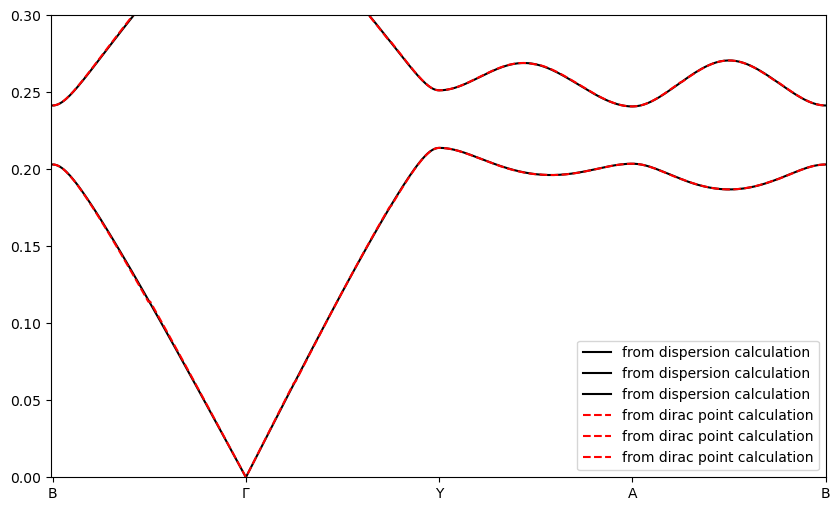

In [92]:
dispersion_finer[indices, :]
figure(figsize=(10, 6))
dispersion = dispersionsv_high_contrast[1629]
plot(range(1, 405), dispersion[:, 1:3], color="black", label="from dispersion calculation");
plot(range(1, 405), dispersion_finer[indices, 1:3], color="red", linestyle="dashed", label="from dirac point calculation");
ylim(0, 0.3)
xlim(0, 3);
legend()
xticks([Gamma_point_idxs..., A_point_idxs..., B_point_idxs..., Y_point_idxs...], [repeat(["Γ"], length(Gamma_point_idxs))...,
        repeat(["A"], length(A_point_idxs))..., repeat(["B"], length(B_point_idxs))..., repeat(["Y"], length(Y_point_idxs))...])
;

In [46]:
filename = "./inverse_design_two_tone_symbols_random/changing_contrast/dirac_points/output/sg2/tm/contrast6/dim2-sg2-101629-res64-tm-epsilon.h5"
f = h5open(filename)
epsilon_og = f["data"][];
close(f);

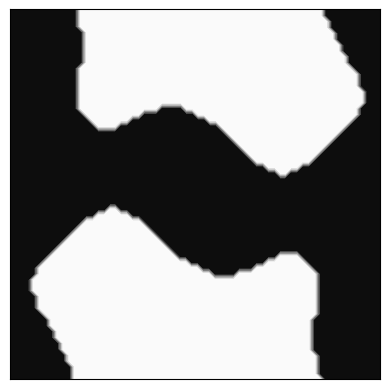

In [50]:
contourf(np.where(epsilon_og .< 8, 0, 16), levels=10, cmap="Greys")
gca().set_aspect("equal")
xticks([])
yticks([])
#savefig("./figures/dirac_point_ucell.pdf");

In [51]:
filename = contrast_dispersion_dir * "dim2-sg2-101629-res64-tm-epsilon.h5"
f = h5open(filename)
epsilon_og = f["data"][];
close(f);

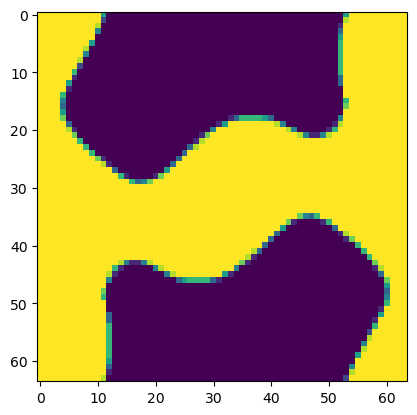

PyObject <matplotlib.image.AxesImage object at 0x7f886bc31ab0>

In [52]:
imshow(epsilon_og)

In [28]:
filename = contrast_dir * "dim2-sg2-101629-res64-tm-epsilon.h5"
f = h5open(filename)
epsilon_og = f["data"][];
close(f);

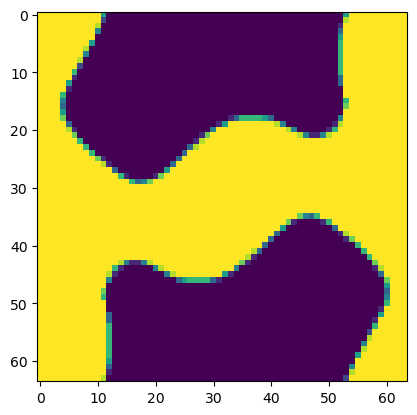

PyObject <matplotlib.image.AxesImage object at 0x7f56b73b5f00>

In [29]:
imshow(epsilon_og)